## FOML Exercise 1b
### Tong Yu


In [51]:
from sklearn.datasets import load_digits
from sklearn import model_selection
import numpy as np
import matplotlib.pyplot as plt

## 3  Nearest Neighbor Classification on Real Data
### 3.1  Exploring the Data

In [52]:
#Load the dataset from sklearn and extract the data

digits = load_digits()
print(digits.keys())

data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

print('data.dtype =', data.dtype)
print('data.shape =', data.shape)
print('images.shape =', images.shape)
print("SIZE OF THESE IMAGES IS {}*{}".format(images.shape[1],images.shape[2]))

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
data.dtype = float64
data.shape = (1797, 64)
images.shape = (1797, 8, 8)
SIZE OF THESE IMAGES IS 8*8


<Figure size 432x288 with 0 Axes>

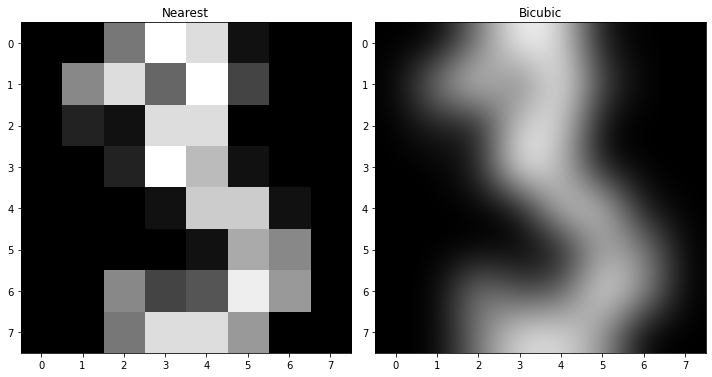

In [5]:
#Visualization of image 3
img = digits.images[3]
assert 2 == len(img.shape)

plt.figure()
plt.gray()
fig, ax = plt.subplots(1,2, figsize = (10,15), tight_layout = True)
ax[0].imshow(img, interpolation = "nearest")
ax[0].set_title("Nearest")
ax[1].imshow(img, interpolation = "bicubic") # also try interpolation="bicubic"
ax[1].set_title("Bicubic")
plt.show()

In [53]:
#Separate the data into a training and a test set
X_all = data
y_all = target

X_train, X_test, y_train, y_test = model_selection.train_test_split(digits.data, digits.target, test_size = 0.4, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print("Size of training set is {}, size of test set is {}".format(X_train.shape[0],X_test.shape[0]))

(1078, 64)
(1078,)
(719, 64)
(719,)
Size of training set is 1078, size of test set is 719


### 3.2  Distance function computation using loops

In [54]:
def dist_loop(training, test):
    N = training.shape[0]
    M = test.shape[0]
    
    dist = np.zeros([N,M])
    for i in range(N):
        for j in range(M):
            g = training[i] - test[j]
            dist[i,j] = np.linalg.norm(g) #Euclidean distance is the l2 norm
    return dist
             

In [22]:
# #Test
# e = np.array([[1,2],[3,4],[5,6],[7,8]])
# f = np.array([[2,2],[2,2]])
# dist = dist_loop(e,f)
# print(dist)
dist1 = dist_loop(X_train, X_test)

In [36]:
%timeit dist_loop(X_train, X_test)

3.92 s ± 114 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### 3.3  Distance function computation using vectorization

#### Compute distance between two matrixes
Suppose Training set P : {N * D}, Test set C : {M * D}
\begin{equation*}
P_i =[P_{i1}P_{i2}...P_{iD}]\\
C_i =[C_{j1}C_{j2}... C_{jD}]\\
\end{equation*}
First, compute the distance  $dist[i,j]$ between $P_{i}$ and $C_{j}$:
\begin{equation*}
d(P_i,C_j) = \sqrt{(P_{i1}-C_{j1})^2 +(P_{i2}-C_{j2})^2+...+(P_{iD}-C_{jD})^2}\\
=\sqrt{(P_{i1}^2+ P_{i2}^2 +...+ P_{iD}^2) + (C_{j1}^2 + C_{j2}^2+...+ C_{jD}^2) - 2\times(P_{i1}C_{j1} +P_{i2}C_{j2}+...P_{iD}C_{jD})}\\
=\sqrt{||P_i||_2+||C_j||_2 - 2\times P_iC_j^T}
\end{equation*}

Then, compute the distance  $dist[i]$ between $P_{i}$ and matrix C:
\begin{equation*}
d(P_i) = \sqrt{(||P_i||_2 ||P_i||_2 ... ||P_i||_2) + (||C_1||_2  ||C_2||_2 ... ||C_N||_2) - 2\times P_iC^T}
\end{equation*}

Finally, compute the distance dist between P and C:
\begin{equation*}
dist = \sqrt{
\begin{bmatrix}
||P_1||_2&||P_1||_2&\cdots&||P_1||_2\\
||P_2||_2&||P_2||_2&\cdots&||P_2||_2\\
\vdots&\vdots&\ddots&\vdots\\
||P_M||_2&||P_M||_2&\cdots&||P_M||_2
\end{bmatrix} 
+ 
\begin{bmatrix}
||C_1||_2&||C_2||_2&\cdots&||C_N||_2\\
||C_1||_2&||C_2||_2&\cdots&||C_N||_2\\
\vdots&\vdots&\ddots&\vdots\\
||C_1||_2&||C_2||_2&\cdots&||C_N||_2
\end{bmatrix}
- 2 \times PC^T}
\end{equation*}






In [7]:
# def dist_vec(training, test):
#     N = training.shape[0]
#     M = test.shape[0]
    
#     dist1 = np.zeros([N,M])
#     for i in range(N):
#         dist1[i] = np.linalg.norm(training[i] - test, axis = 1) #Euclidean distance is the l2 norm
#     return dist1  

In [55]:
def dist_vec(training, test):
    N = training.shape[0]
    M = test.shape[0]
    dist2 = np.zeros([N,M])
    dist2 = np.sqrt(-2* np.dot(training, test.T)+ np.sum(np.square(test), axis =1) + np.transpose([np.sum(np.square(training), axis = 1)]))
    
    return dist2

In [56]:
# #Test
# e = np.array([[1,2,1],[3,4,2],[5,6,3],[7,8,4],[9,10,5],[11,12,6]])
# f = np.array([[2,2,1],[2,4,2],[2,2,3]])
# dist1 = dist_loop(e,f)
# dist2 = dist_vec(e,f)
# print(dist1)
# print(dist2)
# (dist1 == dist2).all()

In [57]:
#Verify two funtion's performances
#Euclidean Distance Matrix
dist1 = dist_loop(X_train, X_test)
dist2 = dist_vec(X_train, X_test)
print("Whether or not distance matrixes from two functions are equal:")
(dist1 == dist2).all()

Whether or not distance matrixes from two functions are equal:


True

In [50]:
#Speed
print("Speed of loops function:")
%timeit dist_loop(X_train, X_test)
print("Speed of vectorization function:")
%timeit dist_vec(X_train, X_test)

Speed of loops function:
3.81 s ± 55.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Speed of vectorization function:
4.4 ms ± 183 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### 3.4  Implement the k-nearest neighbor classifier

In [28]:
def knn_cl(k, X_train, y_train, X_test):
    dist1 = dist_vec(X_train, X_test)
    pred_class = []
    for j in range(X_test.shape[0]):
        sortedDistIndex= np.argsort(dist1[:,j],axis=0)#np.ravel() compresses dimension
        classCount={}
        for i in range(k):
            voteLabel = y_train[sortedDistIndex[i]]# record classes
            #dic.get(key,default):if has key,get value,else get default
            classCount[voteLabel] = classCount.get(voteLabel,0)+1 
            
            maxCount=0
            for m, v in classCount.items():# extract times
                if v>maxCount: 
                    maxCount=v
                    classes=m
        pred_class.append(classes)
    return pred_class
 
# #Test
# group=np.array([[1.0,2.0],[1.2,0.1],[0.1,1.4],[0.3,3.5]])
# input=np.array([[1.1,0.3],[1.0,0.5]])
# label=['A','A','B','B']
# pre = knn_cl(2,group,label, input)
# print(pre)

def cal_err(predict, true):
    return (predict != true).sum() / true.shape[0]

In [29]:
#This part is from Claire.
y_train_new = np.hstack((y_train[y_train == 3],y_train[y_train == 9]))
X_train_new = np.vstack((X_train[y_train == 3],X_train[y_train == 9]))

y_test_new = np.hstack((y_test[y_test == 3],y_test[y_test == 9]))
X_test_new = np.vstack((X_test[y_test == 3],X_test[y_test == 9]))

kvalue = [1,3,5,9,17,33]
Error =[]
for k in kvalue:
    y_pre = knn_cl(k,X_train_new,y_train_new,X_test_new)
    err = cal_err(y_pre, y_test_new)
    Error.append(round(err,5))
print("Error rates under different k: {}".format(Error))

Error rates under different k: [0.01389, 0.00694, 0.00694, 0.00694, 0.00694, 0.02083]


Text(0, 0.5, 'Error rate')

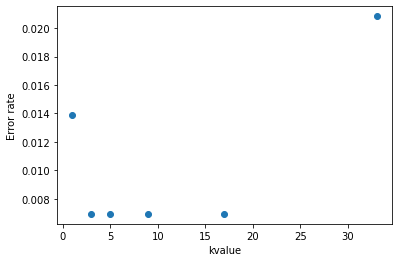

In [30]:
plt.plot(kvalue,Error,'o')
plt.xlabel("kvalue")
plt.ylabel('Error rate')

Comment: At first, KNN error rate decreases as K-value increases; then KNN error rate will increase as K-value increases.We should choose K-value wisely to achieve minimum error rate, optimal K-value of this exercise is around 4-20.

## 4  Cross-validation

In [25]:
def split_folds(data, target, L):
    N = data.shape[0]
    index = np.random.permutation(N)
    X_folds = np.array_split(data[index], L)
    y_folds = np.array_split(target[index], L)
    return X_folds, y_folds
 
# X_folds, y_folds = split_folds(data, target,2)
# print(y_folds)


In [ ]:
L = 2
X_folds, y_folds = split_folds(data, target, L)
for i in range(L):
    X_train = X_folds[i]
    X_test = X_folds[]
    